In [3]:
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

df = pd.read_csv("spam.csv", encoding="latin-1")

df = df[['v1','v2']]
df.columns = ['label','text']

# Label encode
df['label'] = df['label'].map({'ham':0, 'spam':1})

# Preprocess text
stop = set(stopwords.words('english'))

def clean_text(t):
    t = t.lower()
    t = t.translate(str.maketrans('', '', string.punctuation))
    t = " ".join([w for w in t.split() if w not in stop])
    return t

df['clean'] = df['text'].apply(clean_text)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean'])
y = df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Class distribution
print(df['label'].value_counts())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


label
0    4825
1     747
Name: count, dtype: int64


In [4]:
#b
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

y_pred = stump.predict(X_test)
print("Train:", accuracy_score(y_train, stump.predict(X_train)))
print("Test:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Train: 0.8837783262284048
Test: 0.8923766816143498
[[930  36]
 [ 84  65]]


In [5]:
#c
import numpy as np
from sklearn.tree import DecisionTreeClassifier

T = 15
m = X_train.shape[0]

weights = np.ones(m) / m
alphas = []
errors = []

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train, y_train, sample_weight=weights)
    pred = stump.predict(X_train)

    misclassified = (pred != y_train)
    error = np.sum(weights * misclassified)

    alpha = 0.5 * np.log((1-error) / error)

    print(f"\nIteration: {t+1}")
    print("Misclassified idx:", np.where(misclassified)[0][:10])
    print("Weights of misclassified:", weights[misclassified][:5])
    print("Alpha:", alpha)

    # Update weights
    weights *= np.exp(alpha * misclassified)
    weights /= np.sum(weights)

    errors.append(error)
    alphas.append(alpha)



Iteration: 1
Misclassified idx: [ 14  42  49  50  59  62  86  93  96 100]
Weights of misclassified: [0.00022437 0.00022437 0.00022437 0.00022437 0.00022437]
Alpha: 1.0143534603557114

Iteration: 2
Misclassified idx: [ 9 15 22 31 39 49 59 66 76 88]
Weights of misclassified: 1847    0.000186
2052    0.000186
4154    0.000186
3911    0.000186
597     0.000186
Name: label, dtype: float64
Alpha: 0.7967295311027793

Iteration: 3
Misclassified idx: [15 31 39 49 50 59 66 76 86 88]
Weights of misclassified: 2052    0.000343
3911    0.000343
597     0.000343
1572    0.000945
2401    0.000426
Name: label, dtype: float64
Alpha: 0.4431708323478377

Iteration: 4
Misclassified idx: [ 9 15 22 31 39 49 50 59 62 66]
Weights of misclassified: 1847    0.000295
2052    0.000459
4154    0.000295
3911    0.000459
597     0.000459
Name: label, dtype: float64
Alpha: 0.2379462649833079

Iteration: 5
Misclassified idx: [ 9 15 31 39 49 50 59 66 76 86]
Weights of misclassified: 1847    0.000339
2052    0.000528
3

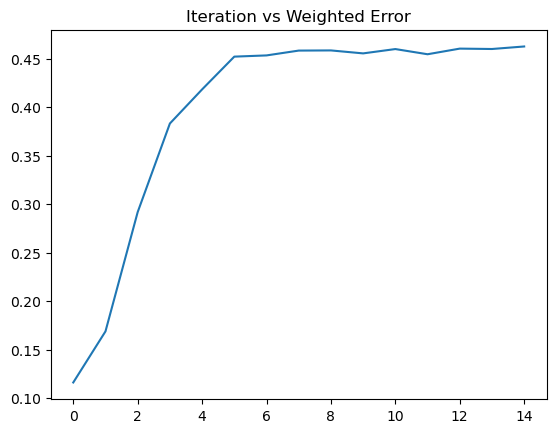

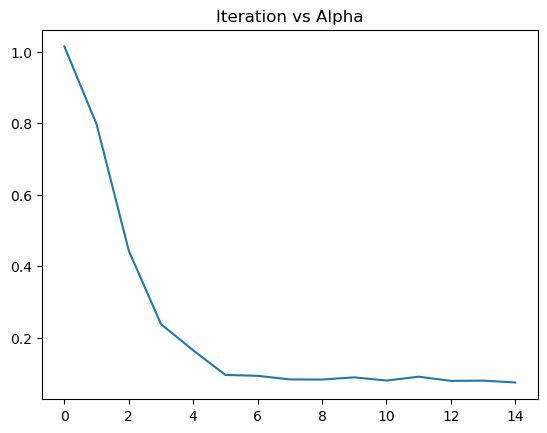

In [6]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title("Iteration vs Weighted Error")
plt.show()

plt.plot(alphas)
plt.title("Iteration vs Alpha")
plt.show()


In [7]:
final_pred = np.zeros_like(y_test)

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train, y_train, sample_weight=None)


In [9]:
#d
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train:", model.score(X_train, y_train))
print("Test:", model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))


Train: 0.9169845187345749
Test: 0.9246636771300448
[[966   0]
 [ 84  65]]


In [17]:
#ques2(a) 

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv("HeartDiseaseTrain-Test.csv")

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

cat_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision stump model
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)


y_pred = stump.predict(X_test)

print("Test Accuracy:", stump.score(X_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7219512195121951

Confusion Matrix:
 [[71 29]
 [28 77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       100
           1       0.73      0.73      0.73       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [19]:
#b
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [5,10,25,50,100]
learning_rates = [0.1,0.5,1.0]

results = {}

for n in n_estimators:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr
        )
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results[(n,lr)] = acc

print(results)


{(5, 0.1): 0.8585365853658536, (5, 0.5): 0.8439024390243902, (5, 1.0): 0.8682926829268293, (10, 0.1): 0.8585365853658536, (10, 0.5): 0.8292682926829268, (10, 1.0): 0.8536585365853658, (25, 0.1): 0.8536585365853658, (25, 0.5): 0.8634146341463415, (25, 1.0): 0.8682926829268293, (50, 0.1): 0.8195121951219512, (50, 0.5): 0.8780487804878049, (50, 1.0): 0.8731707317073171, (100, 0.1): 0.8536585365853658, (100, 0.5): 0.8829268292682927, (100, 1.0): 0.8975609756097561}


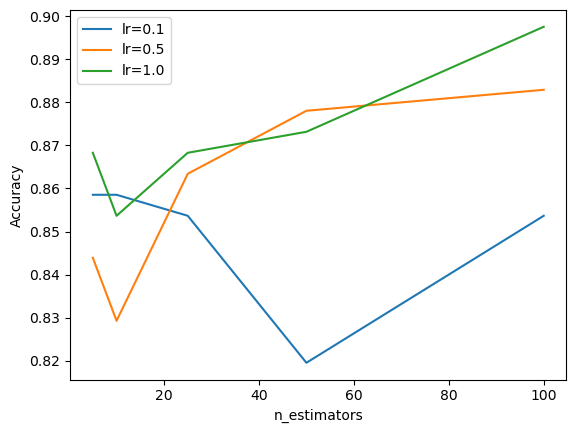

In [20]:
for lr in learning_rates:
    plt.plot(n_estimators,
             [results[(n,lr)] for n in n_estimators],
             label=f"lr={lr}")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()


In [22]:
#c
best = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0
)
best.fit(X_train, y_train)

errors = best.estimator_errors_
weights = best.estimator_weights_


In [24]:
#d
importance = best.feature_importances_
indices = np.argsort(importance)[::-1]

feature_names = X.columns  # Correct feature names

print("Top 5 features:")
for i in indices[:5]:
    print(feature_names[i], ":", importance[i])



Top 5 features:
cholestoral : 0.1919813365294311
oldpeak : 0.1598775269907187
Max_heart_rate : 0.14352890821523068
resting_blood_pressure : 0.0923594501980079
chest_pain_type : 0.09042271954928753


In [35]:
#ques3(a)
clean_lines = []
with open("WISDM_ar_v1.1_raw.txt") as f:
    for line in f:
        line = line.strip()

        # Remove trailing semicolon
        if line.endswith(";"):
            line = line[:-1]

        # Skip empty or corrupted lines
        if len(line.split(",")) < 6 and len(line.split()) < 6:
            continue

        clean_lines.append(line)

with open("clean_wisdm.txt", "w") as f:
    f.write("\n".join(clean_lines))

try:
    df = pd.read_csv(
        "clean_wisdm.txt",
        header=None,
        delimiter=",",
        engine="python",
        on_bad_lines="skip"
    )
except:
    # Fallback: whitespace-delimited parse
    df = pd.read_csv(
        "clean_wisdm.txt",
        header=None,
        delim_whitespace=True,
        engine="python",
        on_bad_lines="skip"
    )

df = df.iloc[:, :6]
df.columns = ["user", "activity", "timestamp", "x", "y", "z"]

print("Raw cleaned shape:", df.shape)

df["x"] = pd.to_numeric(df["x"], errors="coerce")
df["y"] = pd.to_numeric(df["y"], errors="coerce")
df["z"] = pd.to_numeric(df["z"], errors="coerce")

# Drop rows where sensor values are NaN
df = df.dropna(subset=["x", "y", "z"])
df.reset_index(drop=True, inplace=True)

print("After numeric cleaning:", df.shape)


Raw cleaned shape: (1086466, 6)
After numeric cleaning: (1086465, 6)


In [36]:
vigorous = ["Jogging", "Up", "Upstairs"]  # Handling possible names

df["label"] = df["activity"].apply(lambda a: 1 if a in vigorous else 0)

X = df[["x", "y", "z"]]
y = df["label"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (760525, 3)
Test size: (325940, 3)


In [38]:
#b
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

pred_stump = stump.predict(X_test)

print("\n=== Decision Stump Baseline ===")
print("Train Accuracy:", accuracy_score(y_train, stump.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, pred_stump))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_stump))
print("\nClassification Report:\n", classification_report(y_test, pred_stump))



=== Decision Stump Baseline ===
Train Accuracy: 0.6521258341277407
Test Accuracy : 0.6519021905872247

Confusion Matrix:
 [[170673  17473]
 [ 95986  41808]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75    188146
           1       0.71      0.30      0.42    137794

    accuracy                           0.65    325940
   macro avg       0.67      0.61      0.59    325940
weighted avg       0.67      0.65      0.61    325940




Iteration 1
Misclassified idx: [ 0  2  3  5  6  7  8 12]
Weights of misclassified: [1.31488117e-06 1.31488117e-06 1.31488117e-06 1.31488117e-06
 1.31488117e-06]
Alpha: 0.3141983590414825

Iteration 2
Misclassified idx: [ 0  1  2  5  6  8 10 12]
Weights of misclassified: [1.59540041e-06 1.16523920e-06 1.59540041e-06 1.59540041e-06
 1.59540041e-06]
Alpha: 0.15877798780472552

Iteration 3
Misclassified idx: [ 0  1  2  5  6  8 10 12]
Weights of misclassified: [1.74354143e-06 1.27343757e-06 1.74354143e-06 1.74354143e-06
 1.74354143e-06]
Alpha: 0.07251449667006739

Iteration 4
Misclassified idx: [0 1 2 3 5 6 7 8]
Weights of misclassified: [1.81148205e-06 1.32305964e-06 1.81148205e-06 1.43742431e-06
 1.81148205e-06]
Alpha: 0.05071058908092401

Iteration 5
Misclassified idx: [ 4  7  9 11 14 15 18 21]
Weights of misclassified: [1.02455975e-06 1.47575829e-06 1.02455975e-06 1.02455975e-06
 1.02455975e-06]
Alpha: 0.06340633713621921

Iteration 6
Misclassified idx: [ 0  1  2  3  5 10 12 13]
Weight

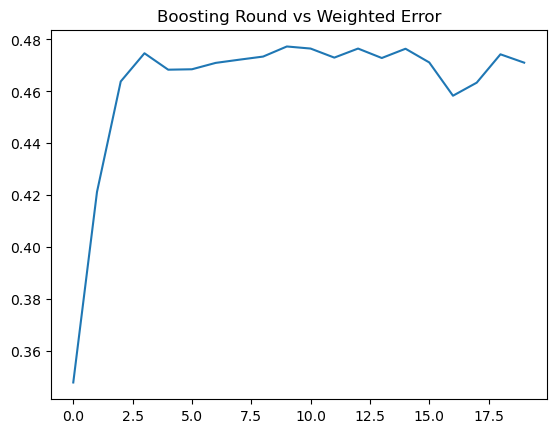

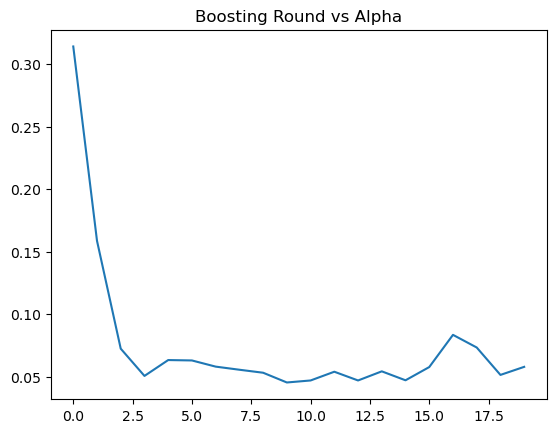

In [39]:
#c
T = 20
m = len(X_train)

weights = np.ones(m) / m
alphas = []
errors = []
models = []

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train_np, y_train_np, sample_weight=weights)
    pred = stump.predict(X_train_np)

    misclassified = (pred != y_train_np)
    error = np.sum(weights * misclassified)

    # alpha
    alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

    print(f"\nIteration {t+1}")
    print("Misclassified idx:", np.where(misclassified)[0][:8])
    print("Weights of misclassified:", weights[misclassified][:5])
    print("Alpha:", alpha)

    # update weights
    weights = weights * np.exp(alpha * misclassified)
    weights = weights / weights.sum()

    errors.append(error)
    alphas.append(alpha)
    models.append((alpha, stump))

# PLOTS
plt.plot(errors)
plt.title("Boosting Round vs Weighted Error")
plt.show()

plt.plot(alphas)
plt.title("Boosting Round vs Alpha")
plt.show()


In [40]:
# Perform weighted voting
final_pred = np.zeros(len(X_test))

X_test_np = np.array(X_test)

for alpha, model in models:
    final_pred += alpha * model.predict(X_test_np)

# Convert weighted sum to class labels
final_pred = np.where(final_pred >= 0, 1, 0)

print("\n=== Manual AdaBoost Results ===")
print("Test Accuracy:", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))



=== Manual AdaBoost Results ===
Test Accuracy: 0.4227587899613426
Confusion Matrix:
 [[     0 188146]
 [     0 137794]]


In [42]:
#d
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0
)
ada.fit(X_train, y_train)

pred_ada = ada.predict(X_test)

print("\n=== Sklearn AdaBoost Results ===")
print("Train Accuracy:", ada.score(X_train, y_train))
print("Test Accuracy :", ada.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ada))



=== Sklearn AdaBoost Results ===
Train Accuracy: 0.6976115183590283
Test Accuracy : 0.6969166104190956
Confusion Matrix:
 [[164210  23936]
 [ 74851  62943]]
